In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d tawsifurrahman/tuberculosis-tb-chest-xray-dataset

 99% 660M/663M [00:19<00:00, 36.0MB/s]
100% 663M/663M [00:19<00:00, 34.8MB/s]


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/tuberculosis-tb-chest-xray-dataset.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [ ]:
# Single Dataset with Split for Training and Validation
train_ds = keras.utils.image_dataset_from_directory(
    directory='/content/TB_Chest_Radiography_Database',  # Directory containing all images
    labels='inferred',  # Labels are inferred from the directory structure
    label_mode='int',  # Labels are integers (class indices)
    batch_size=32,  # Number of samples per batch
    image_size=(256, 256),  # Size to which images are resized
    validation_split=0.2,  # Percentage of data to use for validation (e.g., 0.2 for 20%)
    subset='training',  # Specify 'training' to get the training dataset
    seed=42  # Set a seed for reproducibility
)

# Validation Dataset
validation_ds = keras.utils.image_dataset_from_directory(
    directory='/content/TB_Chest_Radiography_Database',  # Same directory as before
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256, 256),
    validation_split=0.2,  # Same validation split as before
    subset='validation',  # Specify 'validation' to get the validation dataset
    seed=42
)


Found 4200 files belonging to 2 classes.
Using 3360 files for training.
Found 4200 files belonging to 2 classes.
Using 840 files for validation.


In [ ]:
# Normalize
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [ ]:
# create CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                        

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
105/105 [==============================] - 42s 248ms/step - loss: 1.2794 - accuracy: 0.9280 - val_loss: 9.9841 - val_accuracy: 0.1988
Epoch 2/10
105/105 [==============================] - 27s 247ms/step - loss: 0.5530 - accuracy: 0.9649 - val_loss: 8.3611 - val_accuracy: 0.4964
Epoch 3/10
105/105 [==============================] - 27s 249ms/step - loss: 0.5686 - accuracy: 0.9640 - val_loss: 26.4113 - val_accuracy: 0.5238
Epoch 4/10
105/105 [==============================] - 32s 295ms/step - loss: 0.2735 - accuracy: 0.9723 - val_loss: 1.1432 - val_accuracy: 0.9143
Epoch 5/10
105/105 [==============================] - 27s 242ms/step - loss: 0.3393 - accuracy: 0.9726 - val_loss: 1.0321 - val_accuracy: 0.9476
Epoch 6/10
105/105 [==============================] - 27s 245ms/step - loss: 0.2466 - accuracy: 0.9759 - val_loss: 6.7295 - val_accuracy: 0.9048
Epoch 7/10
105/105 [==============================] - 27s 245ms/step - loss: 0.1223 - accuracy: 0.9827 - val_loss: 3.1849 - val_a

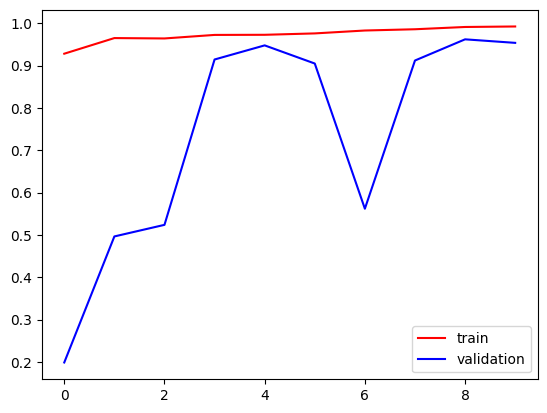

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

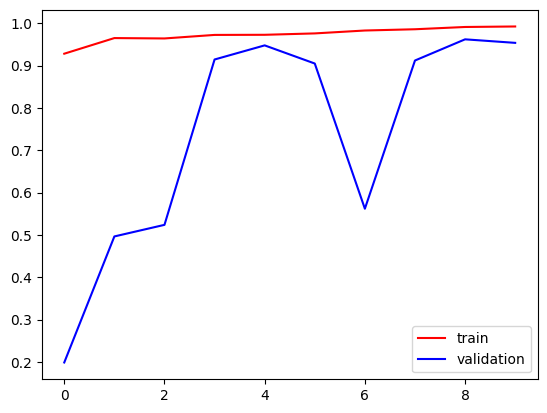

In [ ]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

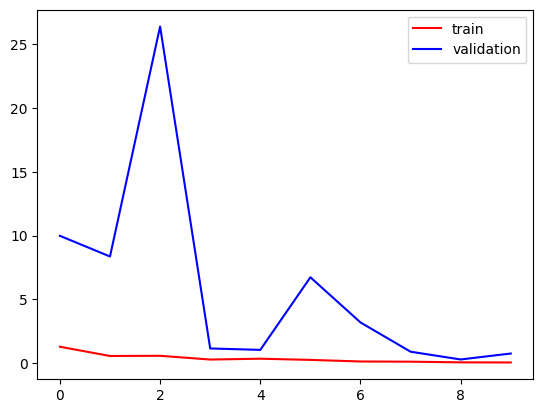

In [ ]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

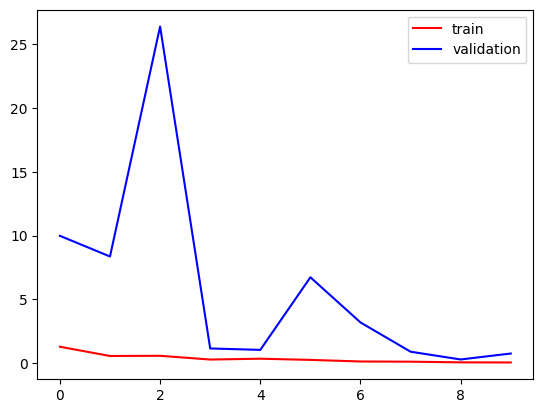

In [ ]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [ ]:
import cv2

In [ ]:
test_img = cv2.imread('/content/tb.png')

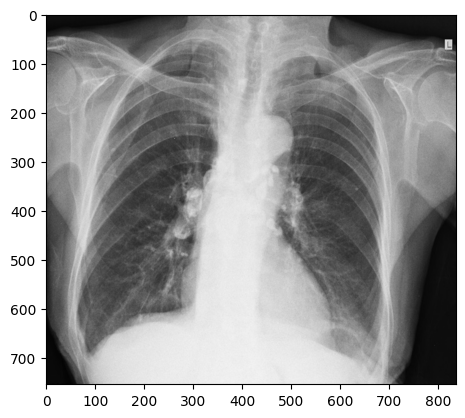

In [ ]:
plt.imshow(test_img)

In [ ]:
test_img.shape

(754, 836, 3)

In [ ]:
test_img = cv2.resize(test_img,(256,256))

In [ ]:
test_input = test_img.reshape((1,256,256,3))

In [ ]:
model.predict(test_input)

1/1 [==============================] - 0s 282ms/step


array([[1.]], dtype=float32)

In [ ]:
test_img2 = cv2.imread('/content/normal.jpg')

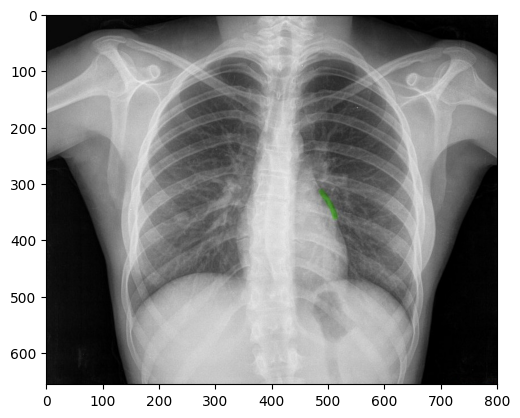

In [ ]:
plt.imshow(test_img2)

In [ ]:
test_img2.shape

(656, 801, 3)

In [ ]:
test_img2 = cv2.resize(test_img2,(256,256))

In [ ]:
test_input2 = test_img2.reshape((1,256,256,3))

In [ ]:
model.predict(test_input2)

1/1 [==============================] - 0s 18ms/step


array([[0.]], dtype=float32)